In [73]:
# import modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [74]:
# age               : Int
# education         : Categorical
# education level   : Int
# marital status    : Categorical
# Occupation        : Catagorical
# relationship      : Categorical
# race              : Categorical
# sex               : Categorical
# Investment profit : Int, but almost all 0
# Investment loss   : Int, but almost all 0
# hours per week    : Int
# native country    : Categorical
# income            : Conditional (e.g. <=50k, >50k)

In [75]:
df = pd.read_csv('2024-introduction-to-data-analysis-clustering/survey.csv')
df = df.drop(columns=['Investment profit', 'Investment loss'])
# for col in df.columns:
#     if col not in ['age', 'education level', 'Investment profit', 'Investment loss', 'hours per week']:
#         print(f'{col}: {df[col].unique()}')
#         print()

In [76]:
# Encoding
LabelEncoders = {}
for col in df.columns:
    if col not in ['age', 'education level', 'Investment profit', 'Investment loss', 'hours per week']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        LabelEncoders[col] = le

In [ ]:
# # Perform PCA or TSNE
# pca = TSNE(n_components=2)
# principal_components = pca.fit_transform(df)

# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# plt.figure(figsize=(10, 6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clustering.labels_, cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Survey Data')
# plt.colorbar(label='Cluster Label')
# plt.show()

k=2, silhouette_score=0.31005913966907206
k=3, silhouette_score=0.32541022786799084
k=4, silhouette_score=0.2591376971991671
k=5, silhouette_score=0.28582650261293213
k=6, silhouette_score=0.2772508122957824
k=7, silhouette_score=0.2970346901377143
k=8, silhouette_score=0.2982736080563993
k=9, silhouette_score=0.3005176951993536


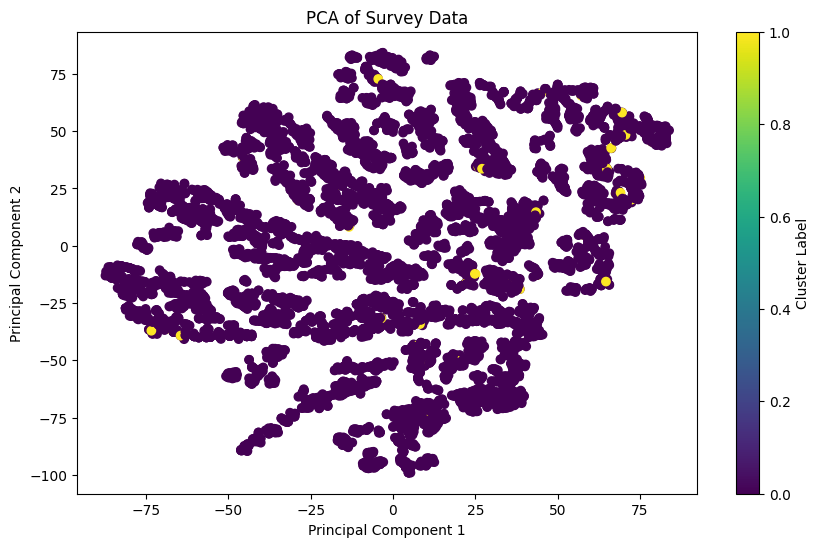

In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    print(f'k={k}, silhouette_score={silhouette_score(df, kmeans.labels_)}')

In [79]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

submit = pd.DataFrame()
submit['ID'] = df.index
submit['Employment Type'] = kmeans.labels_
submit.to_csv('submit.csv', index=False)